In [92]:
import pandas as pd
import seaborn as sns
import numpy as np

In [93]:
df = pd.read_csv('/Users/guillermo/Downloads/Donor___Donor_Ethnicity_by_Donor_Type.csv')
df

,Unnamed: 0,Unnamed: 1,All Ethnicities,White,Black,Hispanic,Unknown,Asian,American Indian/Alaska Native,Pacific Islander,Multiracial
0,All Donor Types,NaN,"413,435","290,985","53,737","51,674",328,"10,588","1,891","1,328","2,904"
1,Deceased Donor,NaN,"239,921","168,019","34,046","29,268",217,"5,098",997,588,"1,688"
2,Living Donor,NaN,"173,514","122,966","19,691","22,406",111,"5,490",894,740,"1,216"


In [94]:
df.drop(['Unnamed: 1', 'American Indian/Alaska Native', 'Pacific Islander', 'Unknown'], axis = 1, inplace = True)
df.rename(columns={'Unnamed: 0': 'Donor Type'}, inplace = True)
df.dtypes

Donor Type         object
All Ethnicities    object
White              object
Black              object
Hispanic           object
Asian              object
Multiracial        object
dtype: object

In [95]:
df['White'] = df['White'].str.replace(',','').astype(int)
df['Black'] = df['Black'].str.replace(',','').astype(int)
df['Hispanic'] = df['Hispanic'].str.replace(',','').astype(int)
df['Asian'] = df['Asian'].str.replace(',','').astype(int)
df['Multiracial'] = df['Multiracial'].str.replace(',','').astype(int)
df['All Ethnicities'] = df['All Ethnicities'].str.replace(',', '').astype(int)
df.values

array([['All Donor Types', 413435, 290985, 53737, 51674, 10588, 2904],
       ['Deceased Donor', 239921, 168019, 34046, 29268, 5098, 1688],
       ['Living Donor', 173514, 122966, 19691, 22406, 5490, 1216]],
      dtype=object)

In [96]:
df1 = df.loc[1:2]
df1.drop(['All Ethnicities'], axis = 1, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [1]:
df_max_scaled = df.copy()
columns = ['All Ethnicities', 'White', 'Black', 'Hispanic', 'Asian', 'Multiracial']
df_max_scaled[columns] = df_max_scaled[columns] /df_max_scaled[columns].abs().max()
display(df_max_scaled)
df_min_max_scaled = df.copy()
columns = ['All Ethnicities', 'White', 'Black', 'Hispanic', 'Asian', 'Multiracial']
df_min_max_scaled[columns] = (df_min_max_scaled[columns] - df_min_max_scaled[columns].min()) / (df_min_max_scaled[columns].max() - df_min_max_scaled[columns].min())
display(df_min_max_scaled)
sns.set_theme(style="darkgrid")
df_min_max_scaled.set_index('Donor Type').T.plot(kind = 'line');


NameError: name 'df' is not defined

# Stacked bar plot of each ethnicity's living donor and deceased donor donations. 
## obvious disparity in the African American community.. Why?

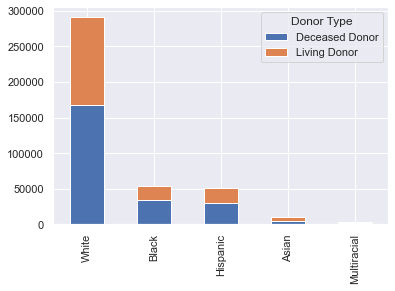

In [98]:
sns.set()
df1.set_index('Donor Type').T.plot(kind = 'bar', stacked = True);

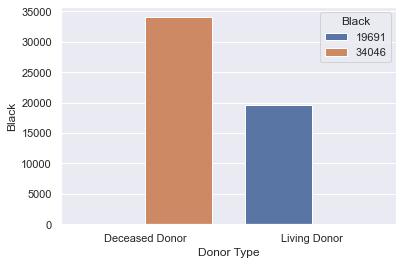

In [99]:


sns.barplot(data = df1, x = 'Donor Type', y = 'Black', hue = 'Black');

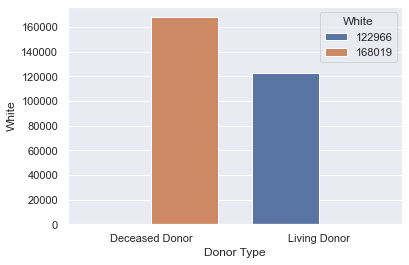

In [100]:
sns.barplot(data = df1, x = 'Donor Type', y = 'White', hue = 'White');

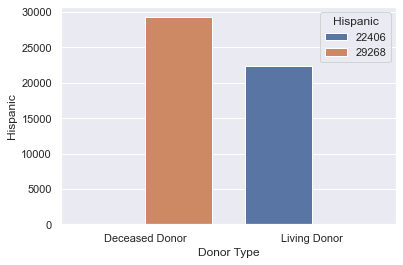

In [101]:
sns.barplot(data = df1, x = 'Donor Type', y = 'Hispanic', hue = 'Hispanic');

<AxesSubplot:xlabel='Donor Type', ylabel='Asian'>

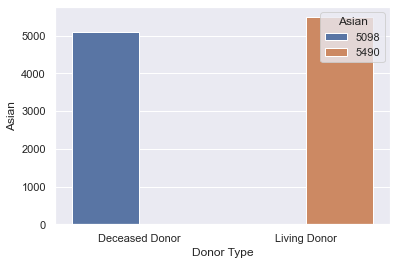

In [102]:
sns.barplot(data = df1, x = 'Donor Type', y = 'Asian', hue = 'Asian')

<AxesSubplot:xlabel='Donor Type', ylabel='Multiracial'>

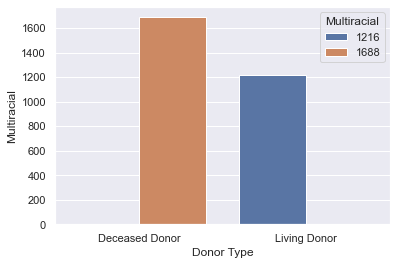

In [103]:
sns.barplot(data = df1, x = 'Donor Type', y = 'Multiracial', hue = 'Multiracial')

# To Do:

### Compare each of the bars that correspond to the ethnicity by their overall population.  I will do this by averaging all of the years and the population of those years.  